# Problem statement
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Building a simple CNN model

#### **Task 1: Reading the data**

Importing all the important libraries

In [1]:
# Importing the required libraries
import pathlib
import os
import PIL

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

You are expected to load the data in the Colab environment by mounting the Google Drive. This will allow you to access the files from Google drive through Colab. 

Steps:
1. Upload the dataset in your Google Drive in a separate folder. Avoid spaces in the name of the folder or the zip file.
2. Mount the Google Drive using the code given below.
3. Unzip the file to access images.
4. Check the path for the datasets - train and test.


Note: The code is commented for you to learn and then make edits to execute the command.

In [3]:
## If you are using the data by mounting the google drive, use the following:
## from google.colab import drive
## drive.mount('/content/gdrive')
from google.colab import drive
drive.mount('/content/gdrive')
## Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [4]:
# Your GDrive Directory
!ls /content/gdrive/MyDrive

 009452.pdf
 11_C16158701_20161123235531.pdf
 13-02-20171486967596.docx
 130716.pdf
 1998620222.pdf
 24072016.pdf
 600042_03583588_LBONUS.pdf
 AJPPD9529B-2016.pdf
'Ananth Adhar.pdf'
'Ananth CV.docx'
'Ananth PAN_1.pdf'
'Anna University Transcripts form (1).pdf'
 ApplicationForm.pdf
'Approach Guide Map new.pdf'
'AWS CLI.gdoc'
 Bank
'BC Notes- GAP Team.zip'
 BoardingPass-Journey22681797995680644-U5HYQL.pdf
 C16132910_ERECEPT.PDF
 Canada
 CLARA-1404.pdf
 Classroom
 CNN_Assignment
'Colab Notebooks'
'Copy of Cloud Computing A.pdf'
'Copy of CNN_assignment.zip'
'Copy of Compilers and operating systems A.pdf'
'Copy of Computer Networks A.pdf'
'Copy of Data Mining.pdf'
'Copy of Theory of Computation A.pdf'
'Course content.pdf'
 cpgme14_appl_form.pdf
 cpgme14_brochure-1.pdf
'CV_Krish Bharadwaj Sekaran (1).pdf'
'CV_Krish Bharadwaj Sekaran.pdf'
 David_Guetta_feat_Nicki_Minaj_-_Light_My_Body_Up.mp3
'Departure ticket.pdf'
 DEP_STFC_50450026_ERECEIPT.pdf
'Difficult Conversations.pdf'
 DirectTaxReport.

In [6]:
# Unzipping the files
# To do: Update the folder name and file name
!unzip gdrive/MyDrive/CNN_Assignment/CNN_Assignment.zip

Archive:  gdrive/MyDrive/CNN_Assignment/CNN_Assignment.zip
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Train/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/basal cell carcinoma/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/squamous cell carcinoma/
   creating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/vascular lesion/
   creating: S

Check the path mentioned in the output: `Skin cancer ISIC The International Skin Imaging Collaboration`

Provide the path for train and test images using pathlib library.

In [7]:
# Defining the path for train and test images
# Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

Check whether the data has been extracted successfully.

In [8]:
# Printing the count of images in each directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


#### **Task 2: Loading the images using keras.preprocessing**

The images are still not loaded in the Colab environment. We have extracted them from the zip file. Now, you are expected to load them in the Colab notebook using the `preprocessing` attribute.

Let's load these images off disk using the helpful image_dataset_from_directory utility. You can refer to the following [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) to know more about the function. You can even refer to the additional notebooks on the page to check how the variables are defined.



Defining the parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Divide the training set into 2 parts: 
*   80% for training 
*   20% for validation



In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Task 3: Visualize the data**

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

Write the code to visualize one instance of all the nine classes present in the dataset

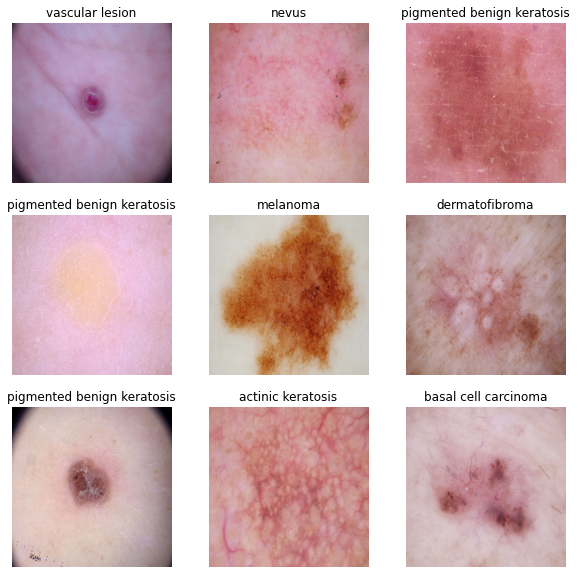

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Configure the dataset for performance
Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Task 4: Create the model**
Create a CNN model, which can accurately detect 9 classes present in the dataset. 


*   Note: The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Use `layers.experimental.preprocessing.Rescaling` for this purpose.

In [16]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Question**: 
Explain the following elements associated with the problem:
1.   Selection of stride value (Reason for using a high/low value)
2.   Padding strategy used (Same/Valid)

The stride value is to check for the filters and the padding strategy is used to get the accurate image without loosing the boundary

#### **Task 5: Compile the model**
Choose an appropirate optimiser and loss function for model training.

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

#### Train the model

In [20]:
# The model needs to be trained for 20 epochs
epochs = 20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 67s 986ms/step - loss: 2.1563 - accuracy: 0.2455 - val_loss: 1.8629 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 52s 935ms/step - loss: 1.7130 - accuracy: 0.3940 - val_loss: 1.5905 - val_accuracy: 0.4564
Epoch 3/20
56/56 [==============================] - 53s 940ms/step - loss: 1.4724 - accuracy: 0.4782 - val_loss: 1.4774 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 53s 941ms/step - loss: 1.3919 - accuracy: 0.4967 - val_loss: 1.3876 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 52s 937ms/step - loss: 1.2640 - accuracy: 0.5497 - val_loss: 1.3487 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 52s 933ms/step - loss: 1.2005 - accuracy: 0.5831 - val_loss: 1.3720 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 52s 928ms/step - loss: 1.1920 - accuracy: 0.5664 - val_loss: 1.4498 - val_accuracy: 0.5101

#### Visualizing training results

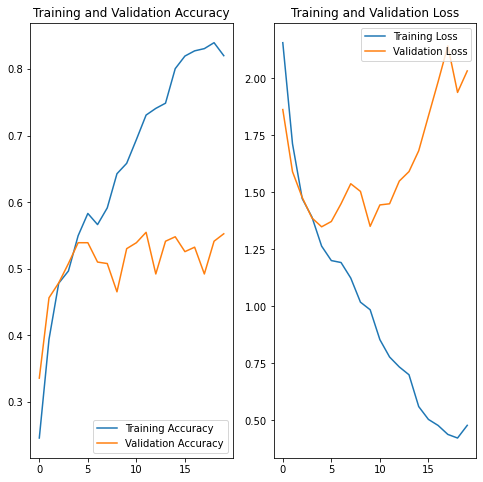

In [21]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit

By looking at the graph it seems like the model is overfitting so we need to have a strategy to overcome this we can use Data Augmentation to overcome this.
The training accuracy is > 80% but the validation accuracy is very low between 55% so this model is under performing and over fitting.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [22]:
# After you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times

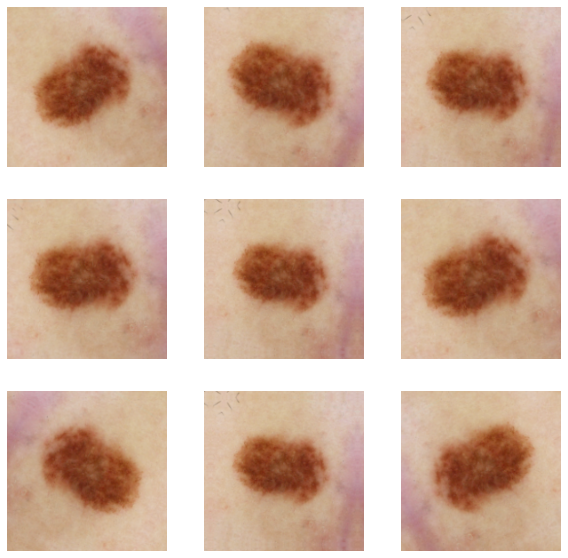

In [23]:
# Visualizing how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

#### **Task 6: Create, compile and train the model**

Model Definition

In [24]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



Compiling the model

In [25]:

## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [26]:
# Note: Train your model for 20 epochs
## Your code goes here
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 63s 1s/step - loss: 2.0221 - accuracy: 0.2400 - val_loss: 1.9070 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 62s 1s/step - loss: 1.7971 - accuracy: 0.3538 - val_loss: 1.7577 - val_accuracy: 0.3781
Epoch 3/20
56/56 [==============================] - 62s 1s/step - loss: 1.5648 - accuracy: 0.4258 - val_loss: 1.5131 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 62s 1s/step - loss: 1.4965 - accuracy: 0.4570 - val_loss: 1.5128 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 62s 1s/step - loss: 1.4760 - accuracy: 0.4738 - val_loss: 1.3963 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 62s 1s/step - loss: 1.3607 - accuracy: 0.5162 - val_loss: 1.3898 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 62s 1s/step - loss: 1.3516 - accuracy: 0.5195 - val_loss: 1.3834 - val_accuracy: 0.5347
Epoch 8/20
56/56 [==

#### Visualizing the results

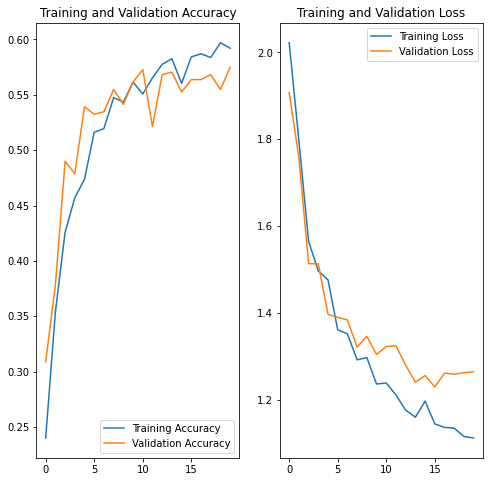

In [27]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Question**:
Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The model is improved now as the validation accuracy and training accuracy is somewhat matching but the accuracy is bit a corncern as it shows 0.6 that is 60% which is low we need to improve this model further.

## Distribution in the dataset

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<br>

#### **Task 7: Find the distribution of classes in the training dataset.**

In [28]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)


2239

In [29]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
1,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
2,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
3,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
4,Skin cancer ISIC The International Skin Imagin...,squamous cell carcinoma
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2235,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2236,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2237,Skin cancer ISIC The International Skin Imagin...,actinic keratosis


Class=7, n=181 (8.084%)
Class=5, n=462 (20.634%)
Class=3, n=438 (19.562%)
Class=2, n=95 (4.243%)
Class=1, n=376 (16.793%)
Class=4, n=357 (15.945%)
Class=6, n=77 (3.439%)
Class=8, n=139 (6.208%)
Class=0, n=114 (5.092%)


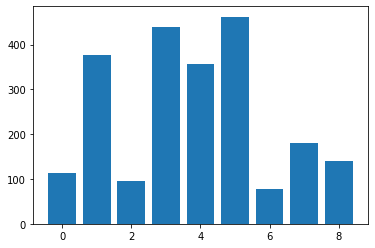

In [30]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Questions:**  
 - Which class has the least number of samples?
 - Which classes dominate the data in terms proportionate number of samples?


Class 6 has least number of samples and class 5 is dominating the dataset so the labels are imbalanced in the dataset we can improve this

#### **Task 8: Rectifying the class imbalance**
You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F38FE063910>: 100%|██████████| 500/500 [00:20<00:00, 24.93 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F38FA717CD0>: 100%|██████████| 500/500 [00:19<00:00, 25.62 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F38FA70EB10>: 100%|██████████| 500/500 [00:19<00:00, 25.63 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F38FA746390>: 100%|██████████| 500/500 [01:51<00:00,  4.48 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F38FA705E10>: 100%|██████████| 500/500 [01:28<00:00,  5.66 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F38FA6719D0>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F38FA713850>: 100%|██████████| 500/500 [00:48<00:00, 10.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F390A02C7D0>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F38FA7174D0>: 100%|██████████| 500/500 [00:19<00:00, 25.81 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [34]:
# Count of images under each class after addition
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0029582.jpg_fbdd560f-004a-4441-aa74-095006b436a2.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031738.jpg_4afe8b3c-c91b-4138-bf92-550da551ebab.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027678.jpg_724f16bb-6307-4fd4-87a3-91f8fc6f8bef.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030191.jpg_8b7451f7-d79a-480e-b916-365bb7d9abbf.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027184.jpg_72e4bfd4-0cfc-4d8f-a6ad-04d4d77ded39.jpg',
 'Skin cancer ISIC The Interna

In [41]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [43]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### **Task 9: Repeating the steps for balanced augmented data**

In [46]:
batch_size = 32
img_height = 180
img_width = 180

**Create a training dataset**

In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Create a validation dataset**

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create your model (make sure to include normalization)**

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


**Compile your model (Choose optimizer and loss function appropriately)**

In [52]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


**Train your model**

In [53]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 186s 972ms/step - loss: 2.0143 - accuracy: 0.2302 - val_loss: 1.6662 - val_accuracy: 0.3875
Epoch 2/20
169/169 [==============================] - 159s 942ms/step - loss: 1.5422 - accuracy: 0.4180 - val_loss: 1.3594 - val_accuracy: 0.4981
Epoch 3/20
169/169 [==============================] - 160s 947ms/step - loss: 1.3241 - accuracy: 0.5156 - val_loss: 1.1717 - val_accuracy: 0.6006
Epoch 4/20
169/169 [==============================] - 159s 944ms/step - loss: 1.0851 - accuracy: 0.5957 - val_loss: 1.2541 - val_accuracy: 0.5516
Epoch 5/20
169/169 [==============================] - 160s 946ms/step - loss: 0.8645 - accuracy: 0.6881 - val_loss: 0.9450 - val_accuracy: 0.6570
Epoch 6/20
169/169 [==============================] - 160s 947ms/step - loss: 0.7291 - accuracy: 0.7333 - val_loss: 0.8271 - val_accuracy: 0.7231
Epoch 7/20
169/169 [==============================] - 160s 948ms/step - loss: 0.6045 - accuracy: 0.7784 - val_loss: 0.8913 -

**Visualize the model results**

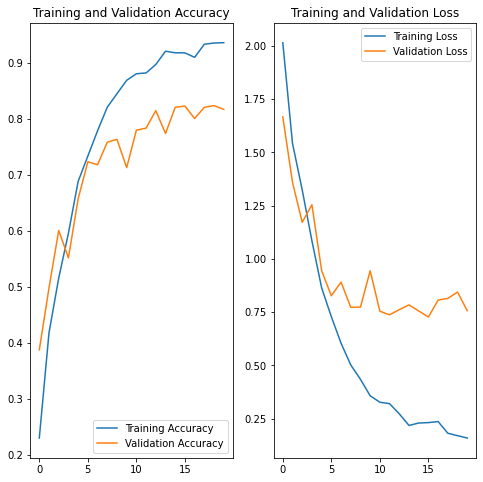

In [54]:
# Graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Task 10: Analyzing the results** 


#### **Question:**
- Did you get rid of underfitting/overfitting from the model? 
- Did class rebalance help in the process?


1.Now the model is balanced and generalized and got improved from previous model version as the accuracy here 80% in validation and the training accuracy is 95% which is good than previous model.
2.Yes class rebalance really improved the accuracy of the model.